# Ad Prediction model

Goal of the project is to predict if a particular user is likely to click on particular ad or not based on his feature.

# Importing libraries and dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising (1).csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Feature Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Luckily we don't have any missing data and our dataset is clean.

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.shape

(1000, 10)

In [7]:
df.duplicated().sum()

0

Since the above value is zero therefore there are no duplicate value in the dataset.

In [8]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

# Exploratory Data Analysis(EDA)

# Checking the age group that the dataset primarily consists of:

C:\Users\Harsh\AppData\Local\Temp\ipykernel_29456\64878271.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))


<AxesSubplot:xlabel='Age', ylabel='Density'>

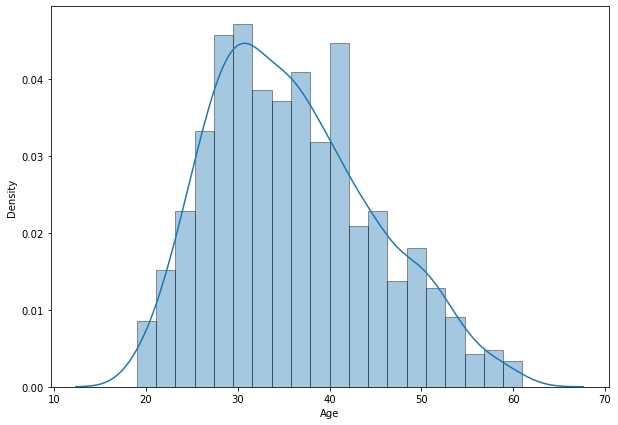

In [9]:
plt.figure(figsize=(10,7))
sns.distplot(df['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [10]:
print('Age of the oldest person:', df['Age'].max(), 'Years')
print('Age of the youngest person:', df['Age'].min(), 'Years')
print('Average age in dataset:', df['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


# Income distribution in different age groups:

<Figure size 864x432 with 0 Axes>

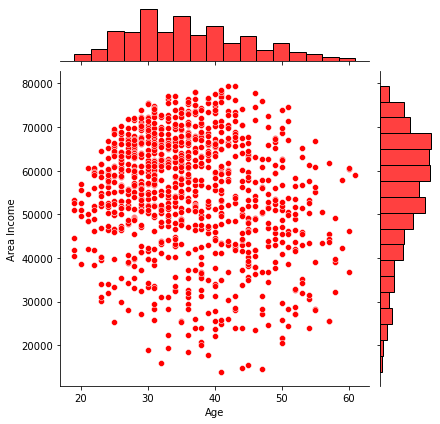

In [11]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age', y='Area Income', color='red', data = df)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

# Age group is spending maximum time on the internet:

<Figure size 864x576 with 0 Axes>

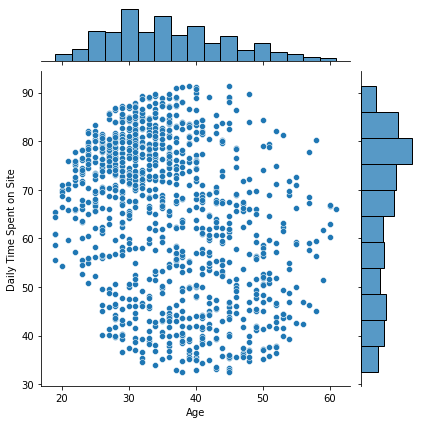

In [38]:
plt.figure(figsize=(12,8))
sns.jointplot(x='Age' , y='Daily Time Spent on Site', data = df)

From the above plot its evident that the age group of 25-40 is most active on the internet.

# Checking which gender has clicked more on online ads

In [13]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Based on above data we can see that a greater number of females have clicked on ads compared to male.

# Checking number of internet users belong to which country in the given dataset

In [14]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

# Did we match our baseline that we set?

In [15]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_29456\1011680261.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


# Relationship between different features:

<Figure size 864x576 with 0 Axes>

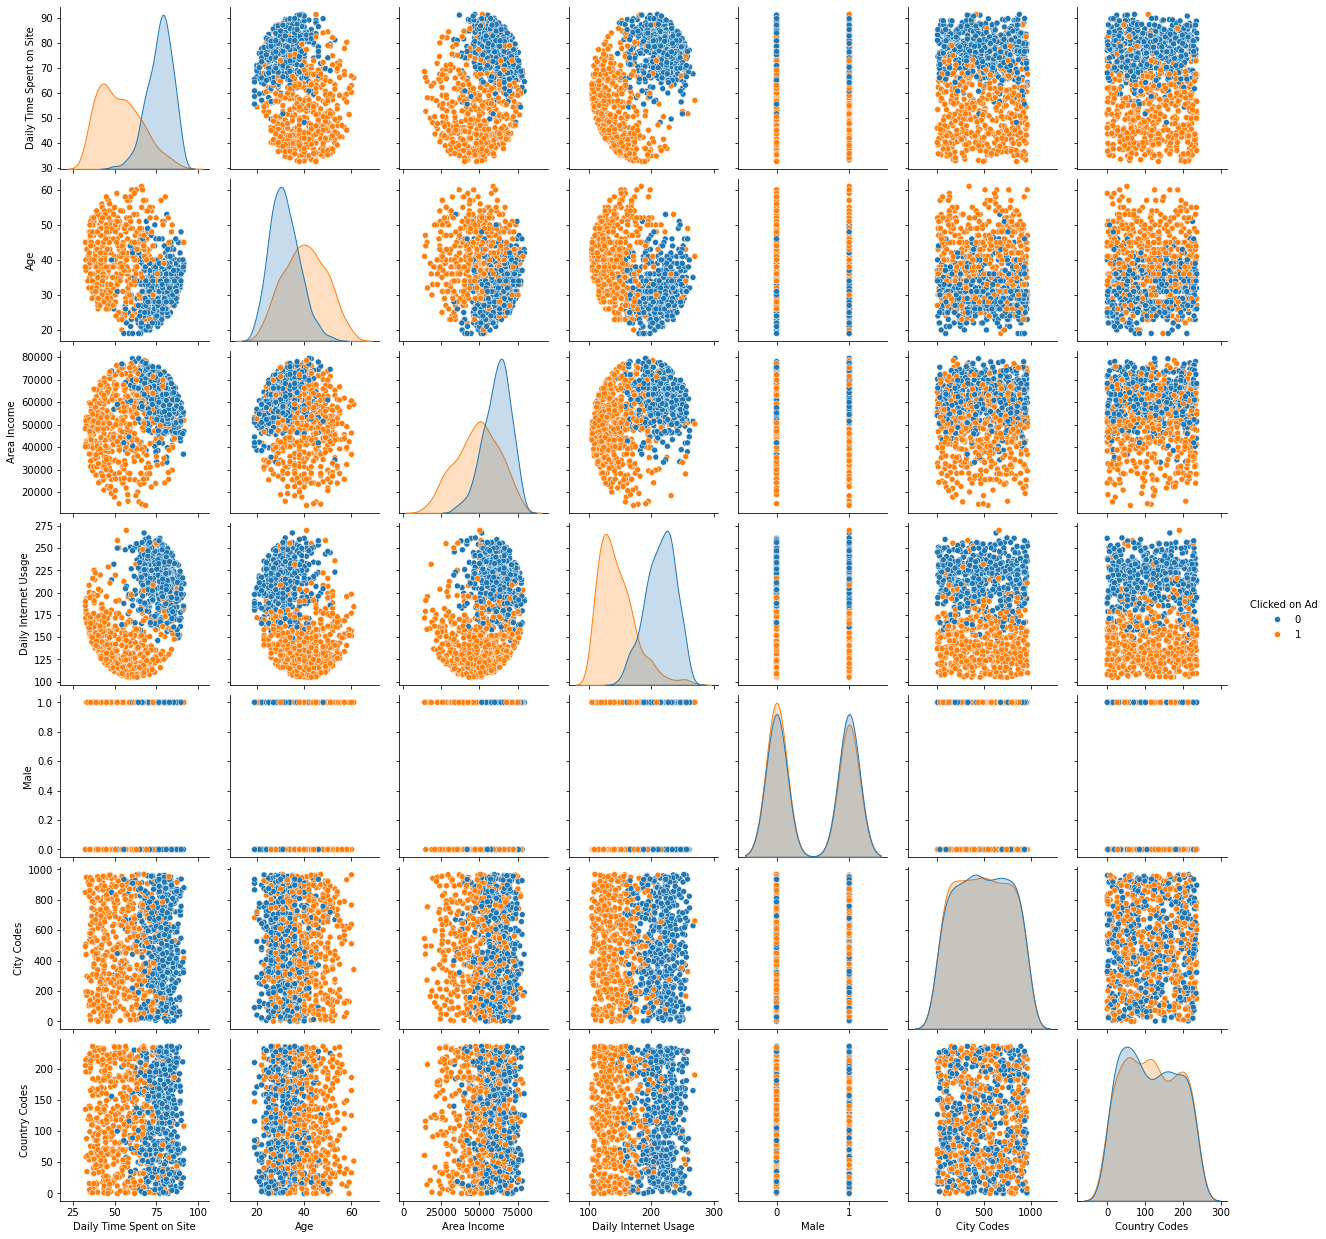

In [37]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='Clicked on Ad')

# Data Cleaning

<AxesSubplot:>

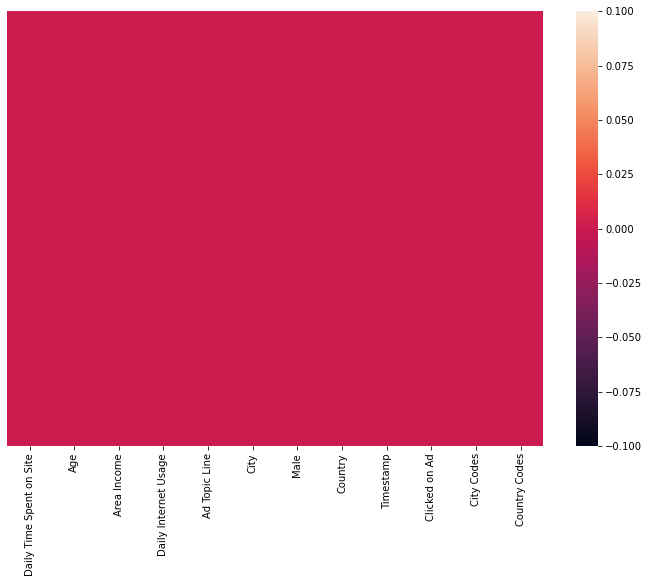

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False)

As we see, we don't have any missing data above

Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we selected the month and the hour from the timestamp as features

In [18]:
df['City Codes']= df['City'].astype('category').cat.codes

In [19]:
df['Country Codes'] = df['Country'].astype('category').cat.codes

In [20]:
df[['City Codes','Country Codes']].head()

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


# Data Model Implementation

In [21]:
X = df.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [22]:
Y = df['Clicked on Ad']

Splitting Dataset:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

# Implementing Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
log_reg_pred = log_reg_model.predict(X_test)

# Implementing Naive Bayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB
nav_bayes_model = GaussianNB()
nav_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [28]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

# Implementing Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [30]:
dec_tree_pred = dec_tree_model.predict(X_test)

# Finding accuracy in each model

In [31]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [32]:
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

89.66666666666666


# Naive Bayes

In [33]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

96.0


# Decision Tree

In [34]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100)

92.66666666666666


# Conclusion:

Comparing all the above implementation models, we conclude that Naive Bayes Algorithm gives us the maximum accuracy for determining the click probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it.